# Comparison of K-Means and DBSCAN Clustering in Python

https://www.geeksforgeeks.org/difference-between-k-means-and-dbscan-clustering/


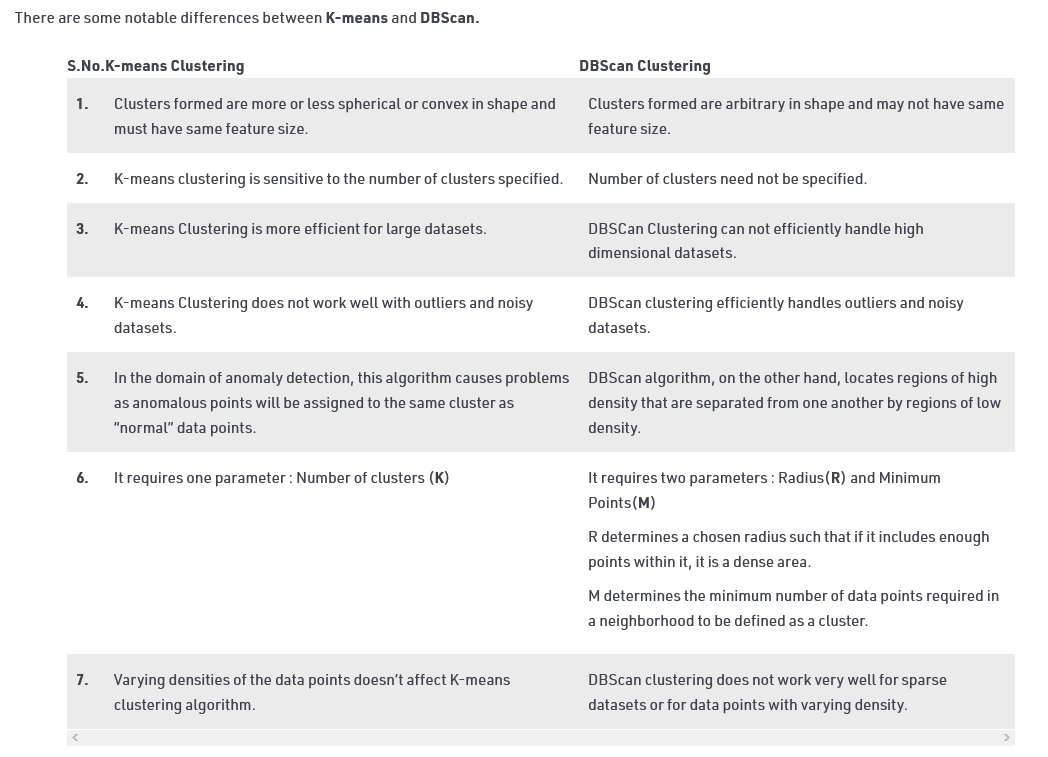

In [1]:
defaultW <- getOption("warn") 
options(warn = -1) 


#  install “package” if it doesn’t exist, and then load it.

if (!require(tidyverse)) install.packages('tidyverse')   # data manipulation
library(tidyverse)

if (!require(ggplot2)) install.packages('ggplot2')
library(ggplot2)

if (!require(GGally)) install.packages('GGally')
library("GGally")

if (!require(reshape2) ) install.packages('reshape2')  #Reshape data - dcast(), melt()  
library(reshape2)


# Cluster analysis
if (!require(cluster)) install.packages('cluster') # clustering algorithms
library(cluster)  
# Evalute Clusters
if (!require(factoextra)) install.packages('factoextra')  # clustering algorithms & visualization
library(factoextra) 

#if (!require(dendextend) ) install.packages('dendextend')
#library(dendextend)
#suppressPackageStartupMessages(library(dendextend))

#install.packages("https://cran.r-project.org/bin/windows/contrib/3.6/foreign_0.8-76.zip")


 
package_version(R.version)

Loading required package: tidyverse
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: GGally
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
Loading required package: reshape2

Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

Loading required package: cluster
Loading required package: factoextra
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


[1] '3.6.1'

In [2]:
#2 Importing the dataset
url = "https://raw.githubusercontent.com/ShubhankarRawat/Mall-Customers-Segmentation/master/data.csv"
rawdata <- read.csv(url,header=TRUE, sep=",", as.is=TRUE)

In [3]:
# get column names
colnames(rawdata)

[1] "CustomerID"             "Gender"                 "Age"                   
[4] "Annual.Income..k.."     "Spending.Score..1.100."

In [4]:
rawdata %>% 
    as_tibble() %>%
    head()

CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76


In [5]:
rawdata %>% str()

'data.frame':	200 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                : chr  "Male" "Male" "Female" "Female" ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


In [6]:
rawdata %>% summary()

   CustomerID        Gender               Age        Annual.Income..k..
 Min.   :  1.00   Length:200         Min.   :18.00   Min.   : 15.00    
 1st Qu.: 50.75   Class :character   1st Qu.:28.75   1st Qu.: 41.50    
 Median :100.50   Mode  :character   Median :36.00   Median : 61.50    
 Mean   :100.50                      Mean   :38.85   Mean   : 60.56    
 3rd Qu.:150.25                      3rd Qu.:49.00   3rd Qu.: 78.00    
 Max.   :200.00                      Max.   :70.00   Max.   :137.00    
 Spending.Score..1.100.
 Min.   : 1.00         
 1st Qu.:34.75         
 Median :50.00         
 Mean   :50.20         
 3rd Qu.:73.00         
 Max.   :99.00         

In [7]:
# Checkany NA, missing data

# unique (unlist (lapply (rawdata, function (x) which (is.na (x)))))
# names(which(colSums(is.na(rawdata)) > 0))
# colnames(rawdata)[apply(is.na(rawdata), 2, any)]
# names(rawdata)[!!colSums(is.na(rawdata))]
sum(is.na(rawdata))     ## Check for missing values

[1] 0

In [8]:
sum(duplicated(rawdata)) ## test for duplicated values

[1] 0

In [9]:
# make a copy and make dummay variable
install.packages('fastDummies')
library('fastDummies')

# rename columns
df <- rawdata %>% rename(
    Annual_income = Annual.Income..k..,
    Spending_score = Spending.Score..1.100.
    ) %>%
    dummy_cols('Gender') 
head(df)

package 'fastDummies' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Unknown\AppData\Local\Temp\RtmpWqY22Z\downloaded_packages


CustomerID,Gender,Age,Annual_income,Spending_score,Gender_Female,Gender_Male
1,Male,19,15,39,0,1
2,Male,21,15,81,0,1
3,Female,20,16,6,1,0
4,Female,23,16,77,1,0
5,Female,31,17,40,1,0
6,Female,22,17,76,1,0


In [10]:
summary(df)

   CustomerID        Gender               Age        Annual_income   
 Min.   :  1.00   Length:200         Min.   :18.00   Min.   : 15.00  
 1st Qu.: 50.75   Class :character   1st Qu.:28.75   1st Qu.: 41.50  
 Median :100.50   Mode  :character   Median :36.00   Median : 61.50  
 Mean   :100.50                      Mean   :38.85   Mean   : 60.56  
 3rd Qu.:150.25                      3rd Qu.:49.00   3rd Qu.: 78.00  
 Max.   :200.00                      Max.   :70.00   Max.   :137.00  
 Spending_score  Gender_Female   Gender_Male  
 Min.   : 1.00   Min.   :0.00   Min.   :0.00  
 1st Qu.:34.75   1st Qu.:0.00   1st Qu.:0.00  
 Median :50.00   Median :1.00   Median :0.00  
 Mean   :50.20   Mean   :0.56   Mean   :0.44  
 3rd Qu.:73.00   3rd Qu.:1.00   3rd Qu.:1.00  
 Max.   :99.00   Max.   :1.00   Max.   :1.00  

### Display data

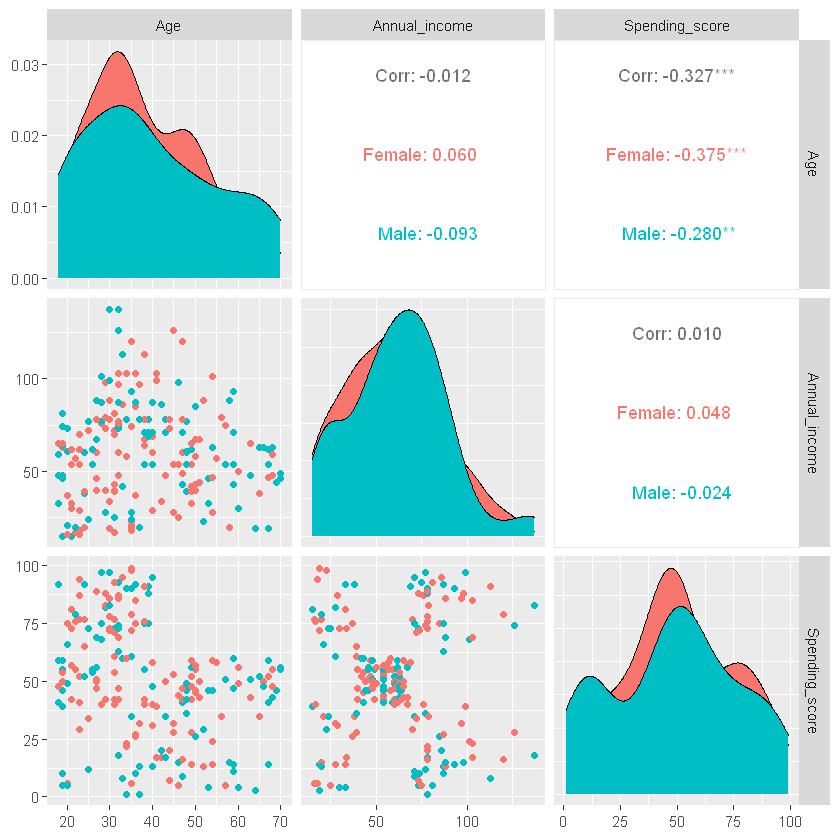

In [11]:
df %>% ggpairs(columns = 3:5,ggplot2::aes(colour=factor(Gender)),upper=list(continuous="cor"))

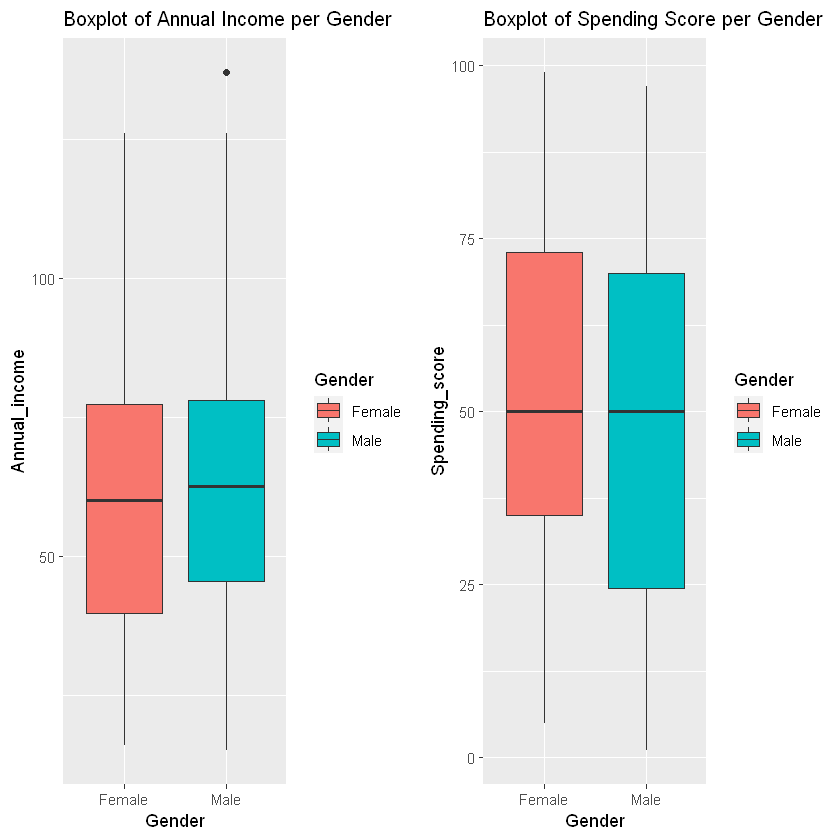

In [12]:
# https://www.kaggle.com/sunnyhv/customer-segmentation-ggplots-metrics

library(cowplot)  # for plot_grid

incomeBox <- ggplot(df, aes(x=Gender, y=Annual_income, fill = Gender)) +
    geom_boxplot() +
    ggtitle("Boxplot of Annual Income per Gender") +
    theme(plot.title = element_text(size=12))

scoreBox <- ggplot(df, aes(x=Gender, y=Spending_score, fill = Gender)) +
  geom_boxplot() +
  ggtitle("Boxplot of Spending Score per Gender")+
    theme(plot.title = element_text(size=12))

plot_grid(incomeBox, scoreBox)

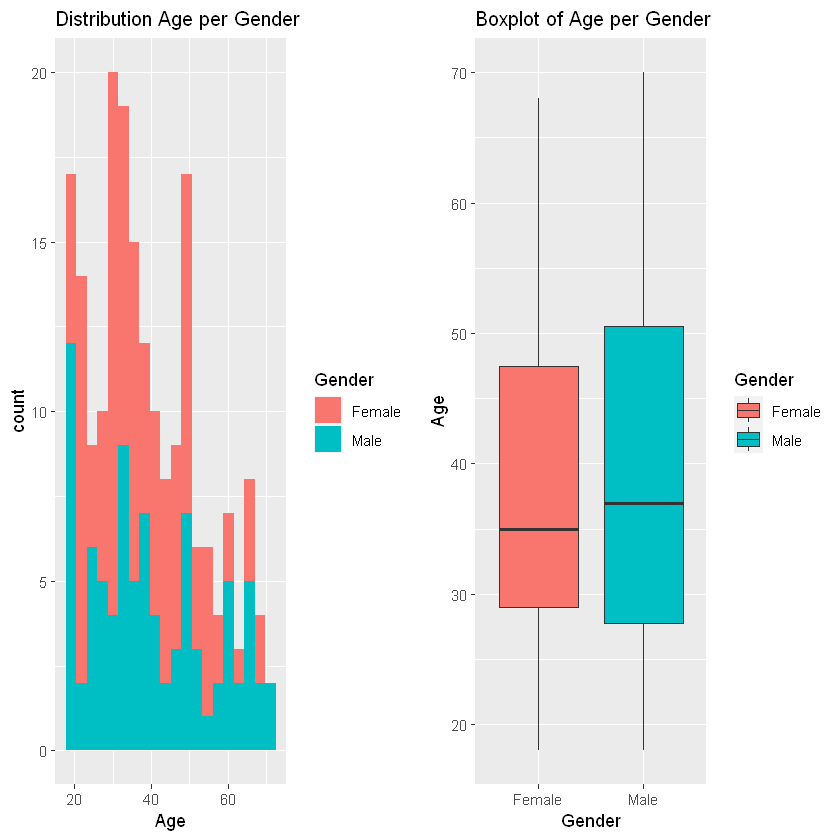

In [13]:
ageHist <- ggplot(df, aes(Age, fill=Gender)) +
          geom_histogram(bins = 20) +
          ggtitle("Distribution Age per Gender")+
    theme(plot.title = element_text(size=12))
         
ageBox <- ggplot(df, aes(x=Gender, y=Age, fill = Gender)) +
          geom_boxplot() +
          ggtitle("Boxplot of Age per Gender")+
    theme(plot.title = element_text(size=12))
   
plot_grid(ageHist, ageBox)


Attaching package: 'ggpubr'

The following object is masked from 'package:cowplot':

    get_legend



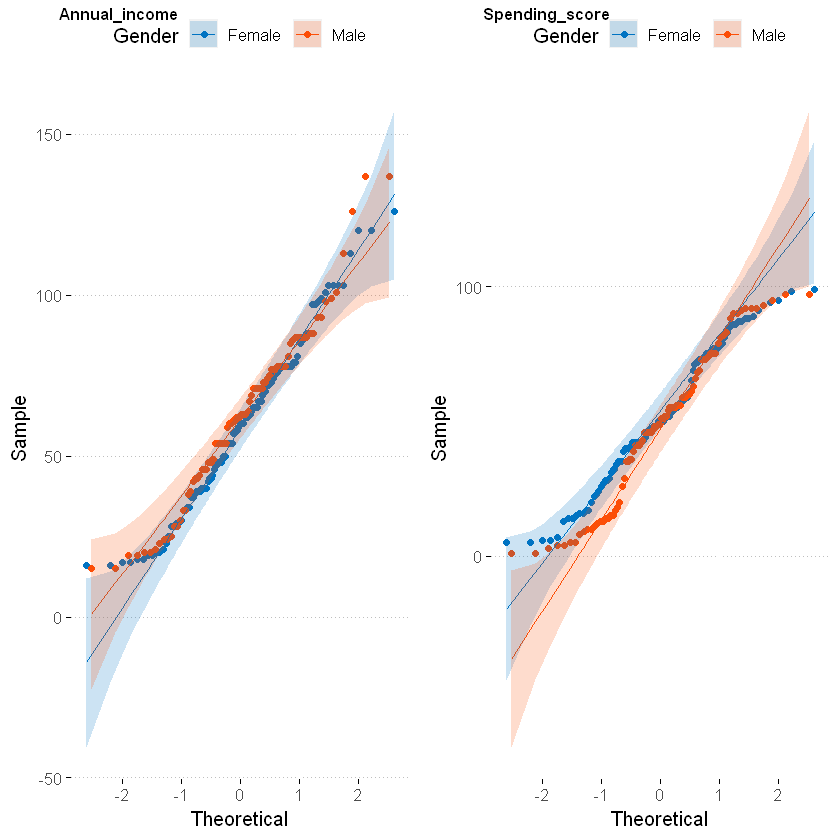

In [14]:
# https://www.datanovia.com/en/lessons/ggplot-qq-plot/

library(ggpubr)
qqplot1 <-ggpubr::ggqqplot(df, x = "Annual_income",
   color = "Gender", 
   palette = c("#0073C2FF", "#FC4E07"),
   ggtheme = theme_pubclean())

qqplot2 <-ggpubr::ggqqplot(df, x = "Spending_score",
   color = "Gender", 
   palette = c("#0073C2FF", "#FC4E07"),
   ggtheme = theme_pubclean())

plot_grid(qqplot1, qqplot2,labels = c('Annual_income', 'Spending_score'), label_size = 10)

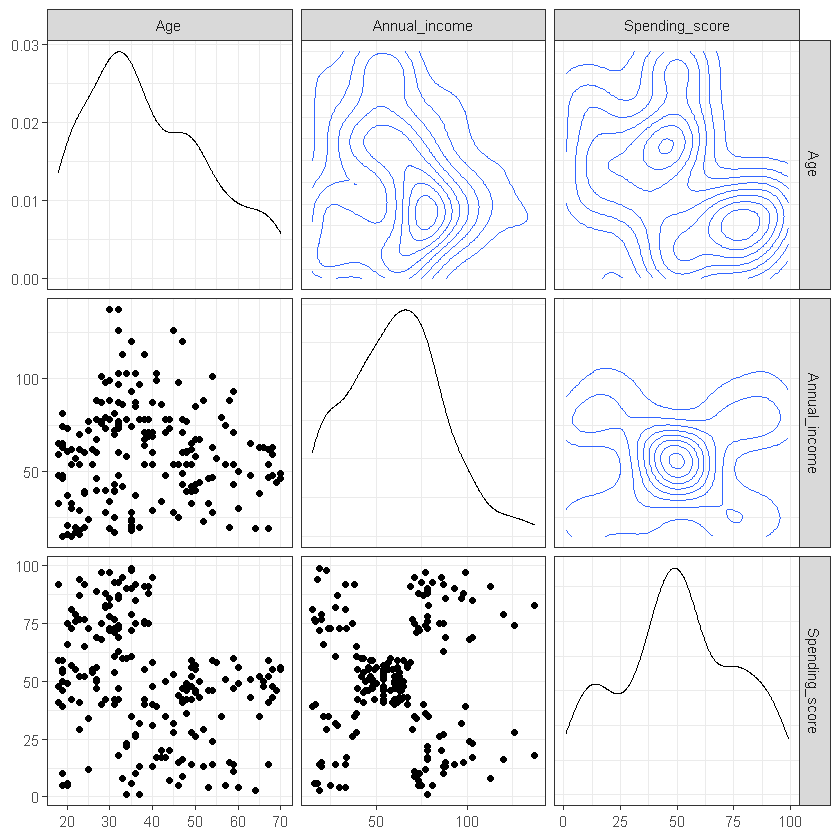

In [15]:
ggpairs(df[,3:5], upper = list(continuous = "density")) +
theme_bw()

### Kmeans Algorithm

In [16]:
# Sacle the data
X_df <- df %>%   
    select(3:5) %>% 
  scale

In [17]:
# https://rpubs.com/ysittaa/cust_segmentation
# Below is the function for building the elbow method.

wss <- function(data, maxCluster = 10) {
    # Initialize within sum of squares
    SSw <- (nrow(data) - 1) * sum(apply(data, 2, var))
    SSw <- vector()
    for (i in 2:maxCluster) {
        SSw[i] <- sum(kmeans(data, centers = i)$withinss)
    }
    plot(1:maxCluster, SSw, type = "o", xlab = "Number of Clusters", ylab = "Within groups sum of squares", pch=19)
}

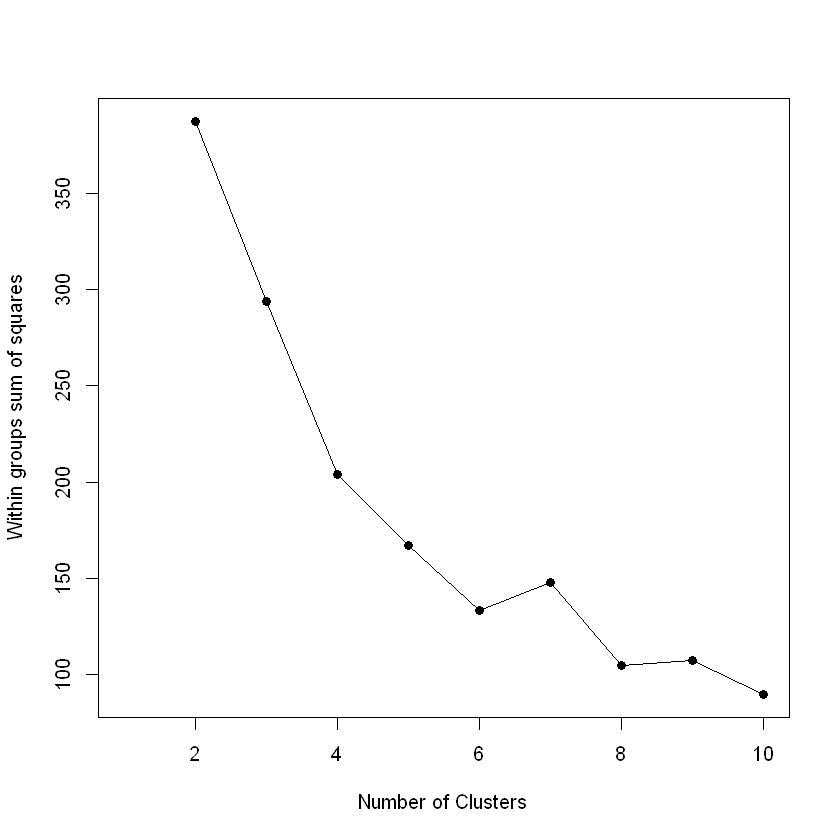

In [18]:
set.seed(123)
wss(X_df)

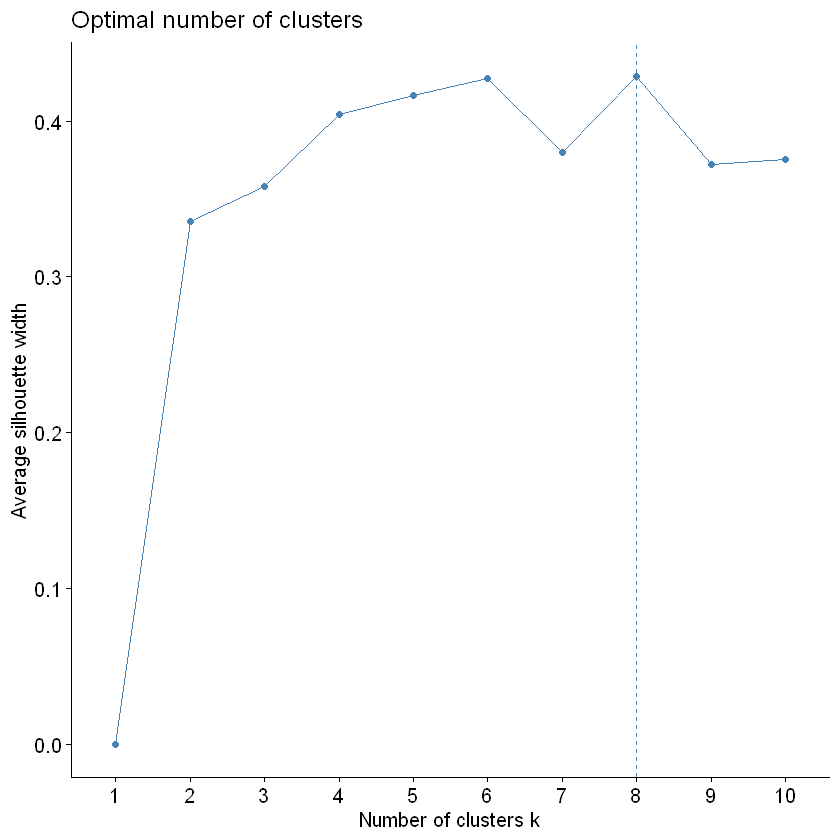

In [19]:
# Visulaize The Optimal Number Of Clusters
fviz_nbclust(X_df,kmeans,method = "silhouette")

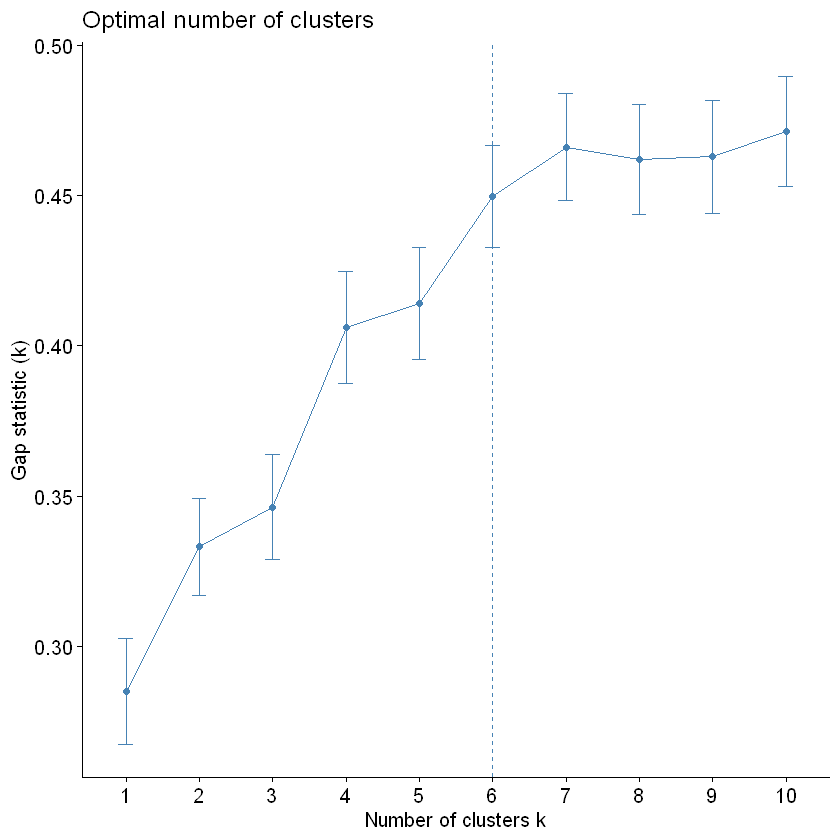

In [20]:
# https://rstudio-pubs-static.s3.amazonaws.com/582266_8f09a8597a3742d1a5fc90fa231c908b.html
# computing the gap statistics method 
set.seed(123)
stat_gap <- clusGap(X_df,FUN=kmeans,nstart=25,K.max = 10,B=50)
fviz_gap_stat(stat_gap)

In [21]:
# using k=6 clusters
clusterK <- kmeans(X_df,6, iter.max = 100,nstart = 50,algorithm = "Lloyd")
clusterK

K-means clustering with 6 clusters of sizes 45, 24, 21, 38, 33, 39

Cluster means:
         Age Annual_income Spending_score
1  1.2515802    -0.2396117    -0.04388764
2 -0.9735839    -1.3221791     1.03458649
3  0.4777583    -1.3049552    -1.19344867
4 -0.8709130    -0.1135003    -0.09334615
5  0.2211606     1.0805138    -1.28682305
6 -0.4408110     0.9891010     1.23640011

Clustering vector:
  [1] 2 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 [38] 2 3 2 1 2 3 2 3 2 1 4 4 4 1 4 4 1 1 1 1 1 4 1 1 4 1 1 1 4 1 1 4 4 1 1 1 1
 [75] 1 4 1 4 4 1 1 4 1 1 4 1 1 4 4 1 1 4 1 4 4 4 1 4 1 4 4 1 1 4 1 4 1 1 1 1 1
[112] 4 4 4 4 4 1 1 1 1 4 4 4 6 4 6 5 6 5 6 5 6 4 6 5 6 5 6 4 6 5 6 4 6 5 6 5 6
[149] 5 6 5 6 5 6 5 6 5 6 5 6 1 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5
[186] 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6

Within cluster sum of squares by cluster:
[1] 23.87015 11.71664 20.52332 20.20990 34.51630 22.36267
 (between_SS / total_SS =  77.7 %)

Available components:

[1] "cl

    cluster – This is a vector of several integers that denote the cluster which has an allocation of each point.
    totss – This represents the total sum of squares.
    centers – Matrix comprising of several cluster centers
    withinss – This is a vector representing the intra-cluster sum of squares having one component per cluster.
    tot.withinss – This denotes the total intra-cluster sum of squares.
    betweenss – This is the sum of between-cluster squares.
    size – The total number of points that each cluster holds.

### Model Visualization Using Annual Income And Spending Score

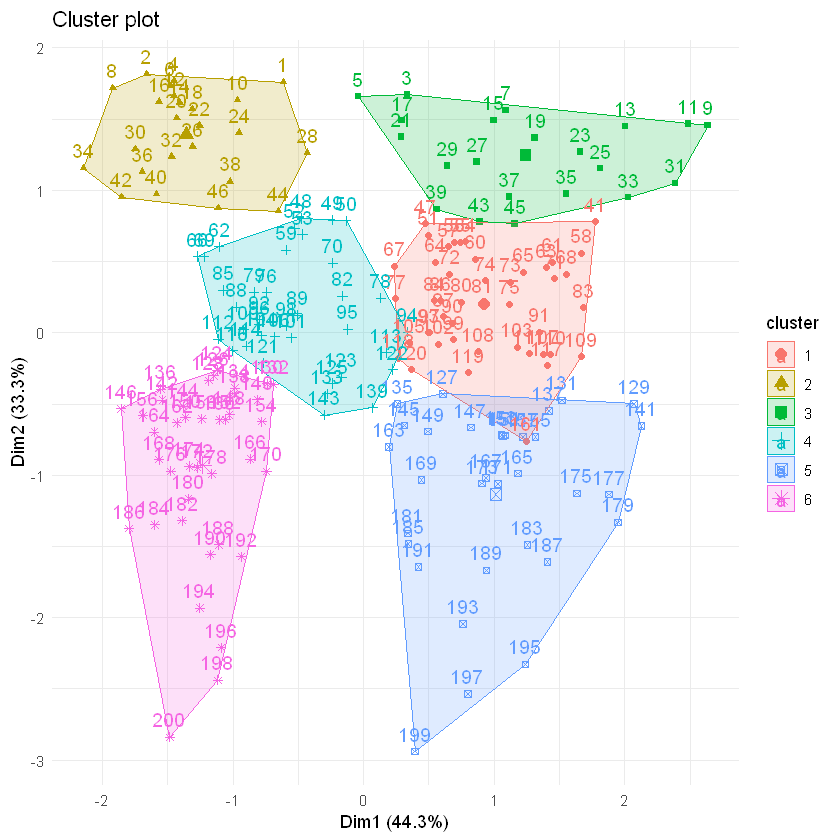

In [22]:
# https://rpubs.com/ysittaa/cust_segmentation
fviz_cluster(clusterK,data = X_df) + 
  theme_minimal()

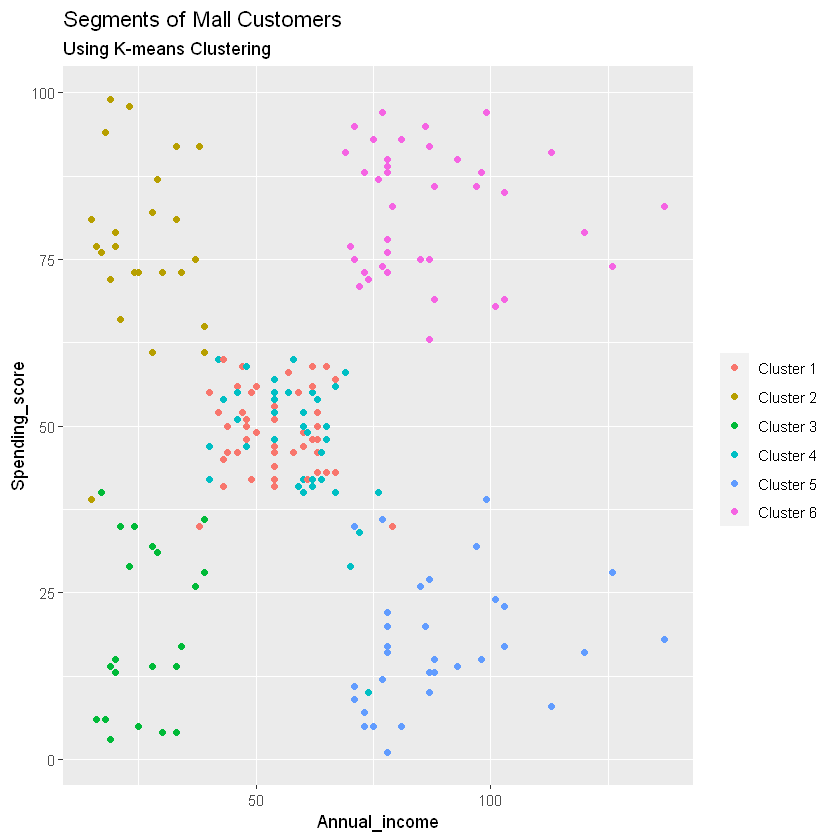

In [23]:
# https://data-flair.training/blogs/r-data-science-project-customer-segmentation/
set.seed(123)
ggplot(df, aes(x =Annual_income, y = Spending_score)) + 
  geom_point(stat = "identity", aes(color = as.factor(clusterK$cluster))) +
  scale_color_discrete(name=" ",
              breaks=c("1", "2", "3", "4", "5","6"),
              labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

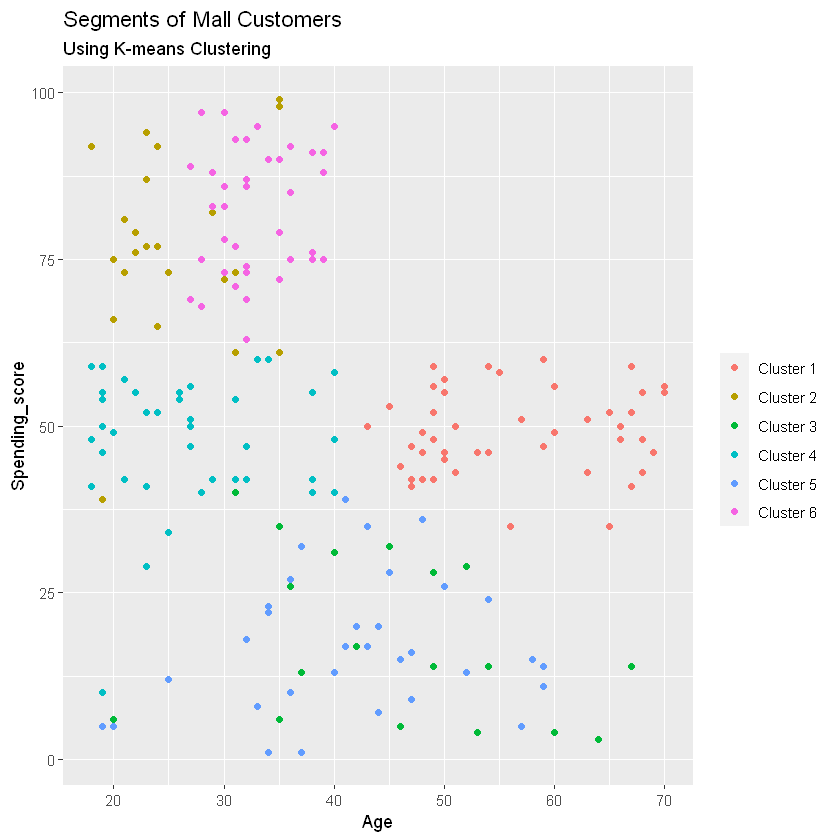

In [24]:
set.seed(123)
ggplot(df, aes(x =Age, y = Spending_score)) + 
  geom_point(stat = "identity", aes(color = as.factor(clusterK$cluster))) +
  scale_color_discrete(name=" ",
              breaks=c("1", "2", "3", "4", "5","6"),
              labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

In [25]:
# add Cluster number back to the orignal data
dfClusted <-  rawdata
dfClusted$cluster <- clusterK$cluster
head(dfClusted)

CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.,cluster
1,Male,19,15,39,2
2,Male,21,15,81,2
3,Female,20,16,6,3
4,Female,23,16,77,2
5,Female,31,17,40,3
6,Female,22,17,76,2


In [26]:
# Summary of the clusters
dfClusted[,-c(1,2)] %>% 
  group_by(cluster) %>% 
  summarise_all("mean")

cluster,Age,Annual.Income..k..,Spending.Score..1.100.
1,56.33333,54.26667,49.06667
2,25.25000,25.83333,76.91667
3,45.52381,26.28571,19.38095
4,26.68421,57.57895,47.78947
5,41.93939,88.93939,16.96970
6,32.69231,86.53846,82.12821


Result:
- Cluster 1 : Medium annual income, medium spending (old age target customer)
- Cluster 2 : Low annual income, high spending (young age spendthrift)
- Cluster 3 : Low annual income, low spending (pennywise)
- Cluster 4 : Medium annual income, medium spending (young age target customer)
- Cluster 5 : High annual income, low spending (miser)
- Cluster 6 : High annual income, high spending (young age wealthy customer)

Other reference

    https://www.datanovia.com/en/lessons/choosing-the-best-clustering-algorithms/
    https://www.kaggle.com/sunnyhv/customer-segmentation-ggplots-metrics

### Density-based spatial clustering of applications with noise (DBSCAN) Algorithm

In [27]:
# Installing Packages
install.packages("fpc")   # # or install.packages("dbscan")
# Loading package
library(fpc)   # or library("dbscan")

Dbscan_cl <- dbscan::dbscan(X_df, eps = 0.45, MinPts = 5) # # We want minimum 5 points with in a distance of eps(0.45)
Dbscan_cl
  
# Checking cluster
Dbscan_cl$cluster

package 'fpc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Unknown\AppData\Local\Temp\RtmpWqY22Z\downloaded_packages


DBSCAN clustering for 200 objects.
Parameters: eps = 0.45, minPts = 5
The clustering contains 5 cluster(s) and 75 noise points.

 0  1  2  3  4  5 
75 14 47 27 31  6 

Available fields: cluster, eps, minPts

[1] 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0
 [38] 1 0 1 0 0 2 3 0 0 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 [75] 2 3 2 2 3 2 2 2 2 2 3 2 2 3 0 2 2 3 2 2 0 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
[112] 3 0 3 3 3 2 2 2 2 3 0 0 4 0 4 0 4 0 4 0 4 0 4 0 4 5 4 0 4 0 4 0 4 0 4 0 4
[149] 0 4 5 4 5 4 5 4 0 4 0 4 0 4 0 4 0 4 5 4 0 0 5 4 0 4 0 4 0 4 0 4 0 4 0 4 0
[186] 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0


Attaching package: 'dbscan'

The following object is masked from 'package:fpc':

    dbscan



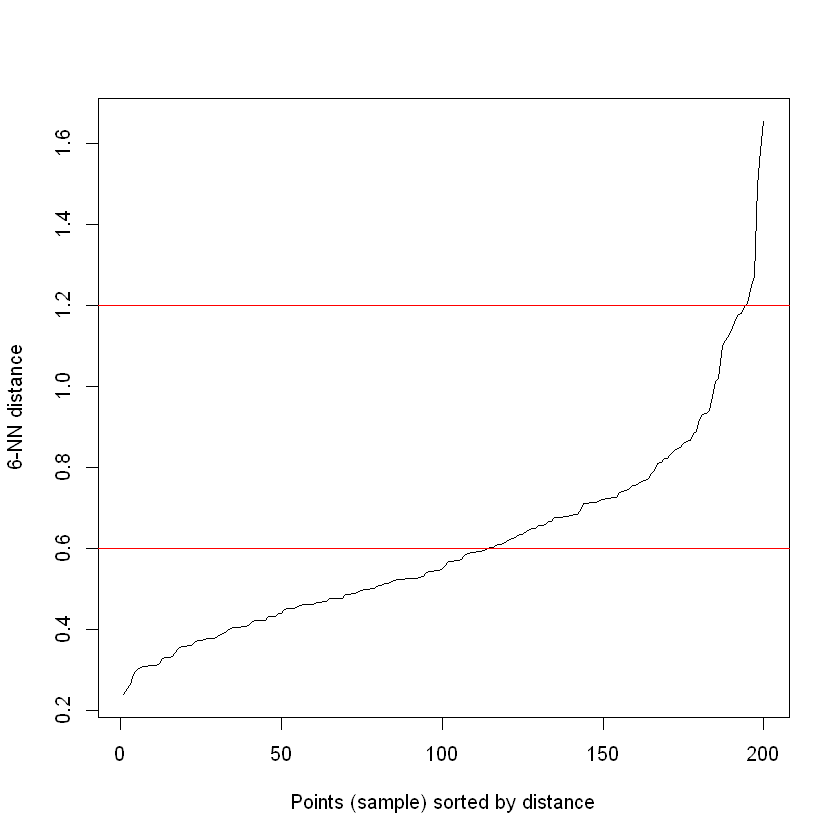

In [29]:
library(dbscan)
# https://stackoverflow.com/questions/12893492/choosing-eps-and-minpts-for-dbscan-r
# (For more than 2 dimensions: minPts=2*dim)

kNNdistplot(X_df,k=6) # choose k=6 as K-means above 
abline(h = c(0.6, 1.2), col="red") # using abline() to highlight the 6-NN distances at the start and end of the knee/elbow in the plot.

In [30]:
# https://stackoverflow.com/questions/12893492/choosing-eps-and-minpts-for-dbscan-r
# Perform grid search.
#gridParam <- expand.grid(
#    eps = seq(0.6, 1.2, 0.01),
#    minPts = seq(1, 10, 1))

#results <- mapply(gridParam$minPts, gridParam$eps, FUN = function(minPts, eps) {
#  cluster <- dbscan::dbscan(X_df, minPts = minPts, eps = eps)$cluster
#  sum <- table(cluster)
#  cat(c("k =", minPts, "; eps =", eps, ";", sum, "\n"))
#})
#result <- pmap(gridParam, dbscan::dbscan, x =X_df)


In [31]:
# by guessing eps from above plot and minPts (2 * features)
db <- dbscan::dbscan(X_df,eps=0.6,minPts = 6)
db

DBSCAN clustering for 200 objects.
Parameters: eps = 0.6, minPts = 6
The clustering contains 5 cluster(s) and 34 noise points.

  0   1   2   3   4   5 
 34 105   5   4  34  18 

Available fields: cluster, eps, minPts

In [32]:
str(db)

List of 3
 $ cluster: int [1:200] 0 1 0 1 0 1 0 1 0 1 ...
 $ eps    : num 0.6
 $ minPts : num 6
 - attr(*, "class")= chr [1:2] "dbscan_fast" "dbscan"


In [33]:
# add Cluster number back to the orignal data
dfClusted2 <-  rawdata
dfClusted2$cluster <- db$cluster
head(dfClusted2)

CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.,cluster
1,Male,19,15,39,0
2,Male,21,15,81,1
3,Female,20,16,6,0
4,Female,23,16,77,1
5,Female,31,17,40,0
6,Female,22,17,76,1


In [34]:
# Summary of the clusters
dfClusted2[,-c(1,2)] %>% 
  group_by(cluster) %>% 
  summarise_all("mean")

cluster,Age,Annual.Income..k..,Spending.Score..1.100.
0,38.55882,71.55882,32.73529
1,39.58095,49.03810,53.88571
2,37.60000,29.00000,28.80000
3,50.50000,29.75000,9.25000
4,32.58824,81.64706,82.55882
5,44.72222,82.77778,15.61111


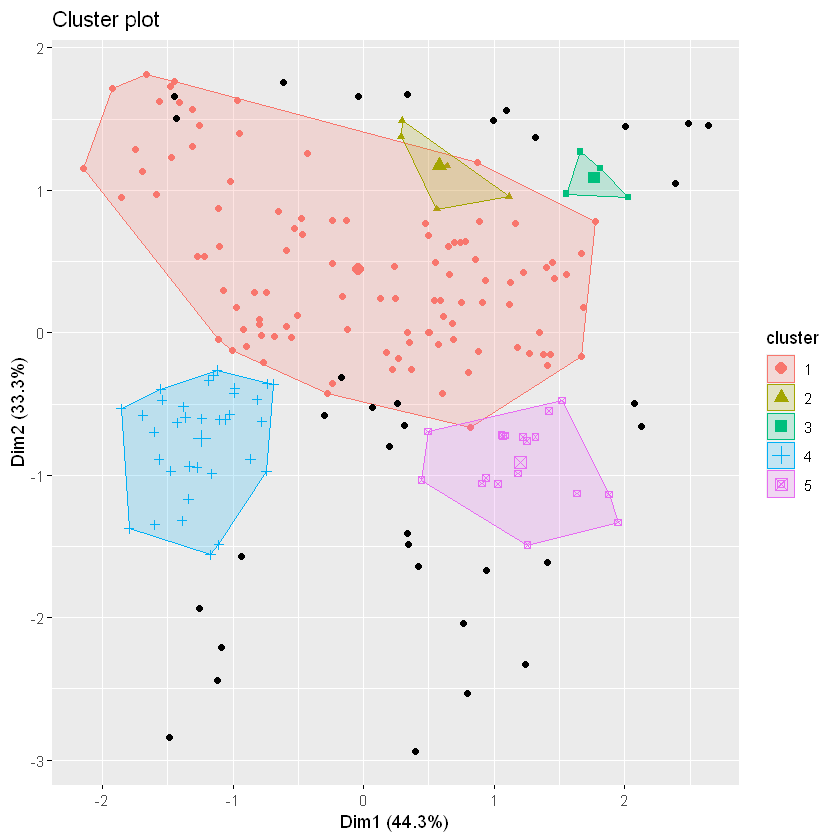

In [35]:
# https://rpubs.com/oduor/dbscanwithnoise
# Ploting DBSCAN results.
factoextra::fviz_cluster(db,X_df,stand = F,ellipse = T,geom = "point")

https://eazydevelop.com/2019/02/18/dbscan-clustering-algorithm-in-r/

Advantages of DBSCAN algorithm
    1. It can discover any number of clusters.
    2. Clusters of varying shapes and sizes can be obtained using the DBSCAN algorithm.
    3. It can detect and ignore outliers.

https://data-flair.training/blogs/r-clustering/

Disadvantages

    If there are no density drops between clusters, then density-based clustering will fail.
    It seems to be difficult to detect noise points if there is variation in the density.
    It is sensitive to parameters i.e. its hard to determine the correct set of parameters.
    The quality of DBSCAN depends on the distance measure.


Limitation of DBSCAN

It is sensitive to the choice of e. In particular, if clusters have different densities, there are two conditions-
If e is too small then we have to define sparser clusters as noise.
e is too large- If we this condition then the denser clusters may be merged together.

##
https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80
http://www.sthda.com/english/wiki/wiki.php?id_contents=7940
https://michael.hahsler.net/SMU/EMIS7332/R/Introduction_to_Data_Mining_R_Examples/chap7.html#density-based-clustering-with-dbscan